In [26]:
%matplotlib inline

import matplotlib.pyplot as plt

from distributions import (
    UniformDist,
    ExponentialDist,
    NormalDist,
    GammaDist,
    BetaDist,
    ChiSquareDist,
)

from plots import (
    plot_pdf,
    plot_cdf,
    plot_pdf_with_interval,
    plot_sample_histogram,
)

from utils import probability_between, suggest_plot_range


In [27]:
def create_distribution(dist_name, **params):
    """
    Create and return a distribution object based on the given name and parameters.

    Examples
    --------
    create_distribution("uniform", a=0, b=5)
    create_distribution("normal", mu=0, sigma=1)
    create_distribution("exponential", lam=2.0)
    """
    name = dist_name.lower()

    if name == "uniform":
        return UniformDist(a=params["a"], b=params["b"])

    elif name == "exponential":
        return ExponentialDist(lam=params["lam"])

    elif name == "normal":
        return NormalDist(mu=params["mu"], sigma=params["sigma"])

    elif name == "gamma":
        return GammaDist(alpha=params["alpha"], beta_param=params["beta_param"])

    elif name == "beta":
        return BetaDist(alpha=params["alpha"], beta_param=params["beta_param"])

    elif name in ["chi-square", "chisquare", "chi2"]:
        return ChiSquareDist(k=params["k"])

    else:
        raise ValueError(f"Unknown distribution name: {dist_name}")


In [28]:
def visualize_distribution(
    dist_name,
    a_interval=None,
    b_interval=None,
    sample_size=1000,
    **params
):
    """
    High-level function to visualize a continuous distribution.

    - dist_name: "uniform", "normal", "exponential", "gamma", "beta", "chi-square"
    - a_interval, b_interval:
        If both given, shade P(a <= X <= b) on the PDF and print the probability.
        If not given, show a sample histogram instead.
    - sample_size: number of random samples for the histogram.
    - params: distribution parameters, e.g.
        uniform: a, b
        exponential: lam
        normal: mu, sigma
        gamma: alpha, beta_param
        beta: alpha, beta_param
        chi-square: k
    """

    # 1. Create distribution object
    dist = create_distribution(dist_name, **params)

    # 2. Suggest a plotting range based on the distribution and its parameters
    x_min, x_max = suggest_plot_range(dist_name, **params)

    print(f"Distribution: {dist_name}")
    print(f"Plot range: [{x_min:.3f}, {x_max:.3f}]")

    # For file names, use a clean key (lowercase, no spaces)
    dist_key = dist_name.lower().replace(" ", "_")

    # 3. Create a figure with 3 subplots: PDF, CDF, and Interval/Histogram
    fig, axes = plt.subplots(1, 3, figsize=(18, 4))

    # ---- PDF ----
    plot_pdf(
        dist,
        x_min,
        x_max,
        ax=axes[0],
        title=f"{dist_name.title()} PDF",
        save_as=f"{dist_key}_pdf.png"      # saved to images/
    )

    # ---- CDF ----
    plot_cdf(
        dist,
        x_min,
        x_max,
        ax=axes[1],
        title=f"{dist_name.title()} CDF",
        save_as=f"{dist_key}_cdf.png"      # saved to images/
    )

    # ---- INTERVAL OR HISTOGRAM ----
    if (a_interval is not None) and (b_interval is not None):
        # Shade [a_interval, b_interval] on the PDF
        _, prob = plot_pdf_with_interval(
            dist,
            x_min,
            x_max,
            a=a_interval,
            b=b_interval,
            ax=axes[2],
            title=f"{dist_name.title()} Interval",
            save_as=f"{dist_key}_interval.png"   # saved to images/
        )

        print(f"P({a_interval} <= X <= {b_interval}) = {prob:.4f}")

    else:
        # Show sample histogram vs PDF if no interval is specified
        plot_sample_histogram(
            dist,
            sample_size,
            x_min,
            x_max,
            ax=axes[2],
            title=f"{dist_name.title()} Histogram",
            save_as=f"{dist_key}_hist.png"       # saved to images/
        )

    # Layout & display
    plt.tight_layout()
    plt.show()

    # 4. Analytical mean and variance
    print(f"Mean (analytical): {dist.mean():.4f}")
    print(f"Variance (analytical): {dist.var():.4f}")


Distribution: uniform
Plot range: [-1.000, 11.000]


TypeError: plot_pdf() got an unexpected keyword argument 'save_as'

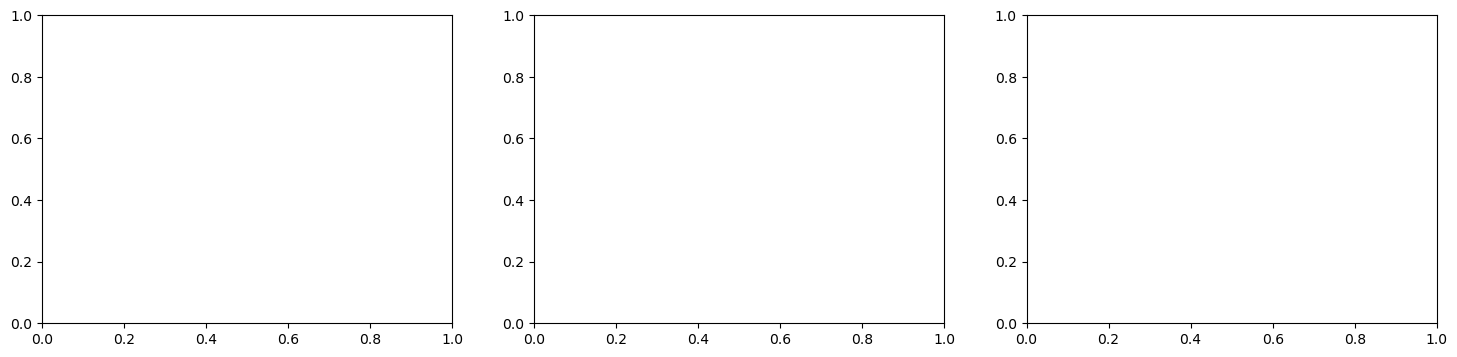

In [29]:
# Uniform example

visualize_distribution(
    "uniform",
    a_interval=2,
    b_interval=7,
    a=0,
    b=10,
    sample_size=2000
)


In [ ]:
# Cell 4b: Exponential example

visualize_distribution(
    "exponential",
    a_interval=0,
    b_interval=2,
    lam=1.5,
    sample_size=2000
)


Distribution: normal
Plot range: [-4.000, 4.000]


TypeError: plot_pdf() got an unexpected keyword argument 'save_as'

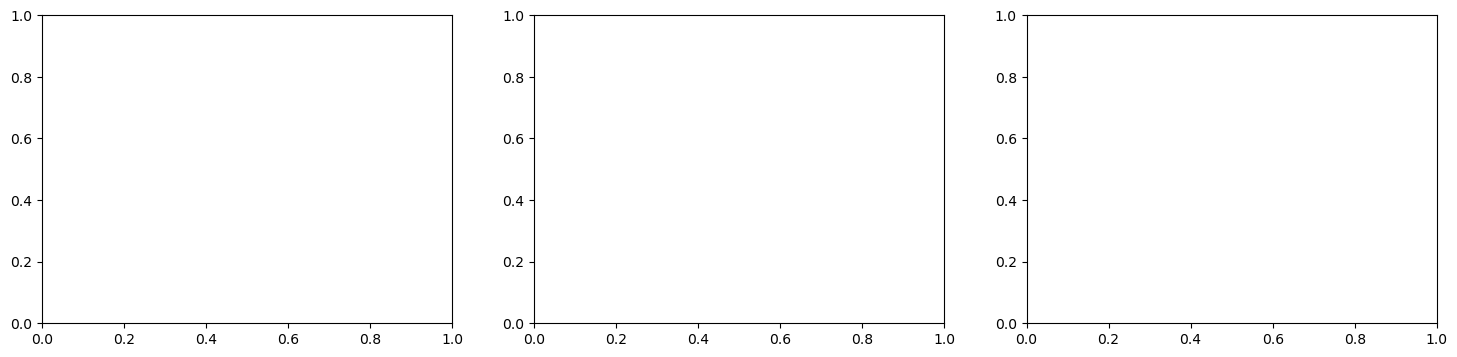

In [ ]:
# Cell 4c: Normal example

visualize_distribution(
    "normal",
    a_interval=-1,
    b_interval=1,
    mu=0,
    sigma=1,
    sample_size=3000
)


In [ ]:
# Cell 4d: Gamma example

visualize_distribution(
    "gamma",
    a_interval=0,
    b_interval=3,
    alpha=3,
    beta_param=2,
    sample_size=3000
)

In [ ]:
# Cell 4e: Beta example

visualize_distribution(
    "beta",
    a_interval=0.2,
    b_interval=0.6,
    alpha=2,
    beta_param=5,
    sample_size=4000
)

In [ ]:
# Cell 4f: Chi-square example

visualize_distribution(
    "chi-square",
    a_interval=1,
    b_interval=6,
    k=4,
    sample_size=4000
)